In [9]:
import torch
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt
from dataset.raw_data import private_train_data
from dataset import PrivateDataset
from hydra import initialize, compose
import matplotlib.pyplot as plt

In [2]:
with initialize(version_base=None, config_path="../config/model"):
    cfg = compose(config_name="aqf")

In [4]:
dts = PrivateDataset(
    "/home/hoang/Documents/CodeSpace/air-quality-forecasting/data-private/",
    normalize_mean=cfg.data.normalize_mean,
    normalize_std=cfg.data.normalize_std,
)

In [6]:
air_loc = dts[0]["air_locs"]
meteo_loc = dts[0]["meteo_locs"]

In [11]:
from models.aqf.utils import inverse_distance_weighting
weight, _ = inverse_distance_weighting(air_loc, beta=-1)

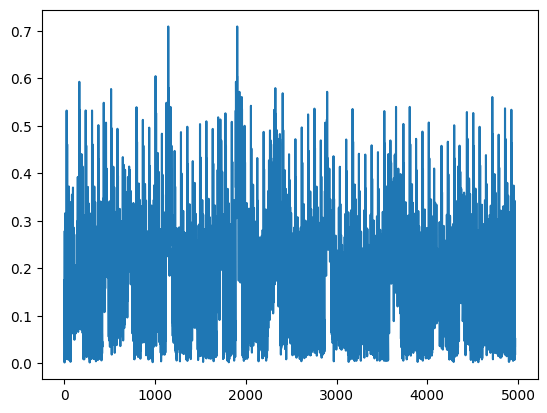

In [12]:
plt.plot(weight)

In [4]:
x = torch.arange(12)

x.reshape(-1, 3)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

In [2]:
data = private_train_data("/home/hoang/Documents/CodeSpace/air-quality-forecasting/data-private/data-train-org")

In [24]:
from utils.functional import extract_wind
temp = []

for station in data["meteo"].values():
    # temp = temp.append(station["data"]["surface_pressure"], ignore_index=True)
    dt = station["data"]
    _, winspeed = extract_wind(dt["u10"].tolist(), dt["v10"].tolist())

    temp.extend(winspeed)

In [25]:
temp = torch.tensor(temp)
temp.mean(), temp.std()

(tensor(2.3317), tensor(1.9003))

In [13]:
data["air"].keys()

dict_keys(['S0000457-Nguyen Che Nghia', 'S0000210-Truong THCS Yen So', 'S0000349-Ecohome Phuc Loi', 'S0000370-Ba Trieu', 'S0000588-Truong THCS Ngo Si Lien', 'S0000399-Truong Mam non Thuc hanh Hoa Sen', 'S0000531- Minh Tri', 'S0000347- Gamuda Gardens ', 'S0000509-Van Phu', 'S0000403-Truong THCS PASCAL', 'S0000148-TT doi moi CN - CNC Hoa Lac', 'S0000551-Truong Mam non Viet - Bun', 'S0000169-Ngoc Thuy', 'S0000289- Nhan Chinh', 'S0000319-Bat Trang', 'S0000328-Luong The Vinh', 'S0000497-Chuyen My', 'S0000331-Truong THCS Le Quy Don', 'S0000157-Truong Mam non GCA Ecolife Capitol', 'S0000611-Nguyen Ngoc Vu', 'S0000621-Truong Pho Thong Lien Cap Sinh Thai EraSchool', 'S0000336-Truong THCS Nguyen Trai', 'S0000554-Truong Mam Non Thuc hanh Hoa Hong', 'S0000137-Ngoc Khanh', 'S0000630-Truong Tieu hoc Thi tran Soc Son', 'S0000310-Hang Trong', 'S0000475-Chung cu A1 - KDT Ha Dinh', 'S0000547-Phu Dong', 'S0000624-Cong ty co phan cong nghe MobiFone toan cau', 'S0000136-Linh Dam', 'S0000504-Le Trong Tan', 

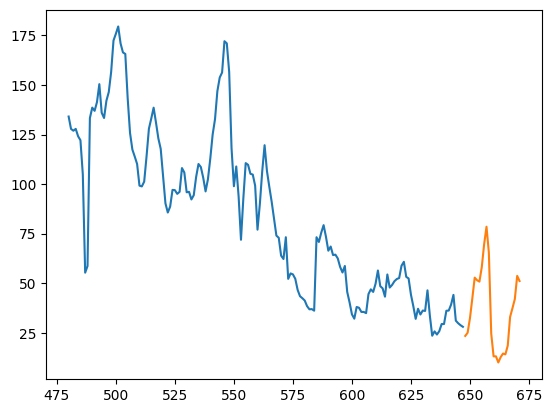

In [15]:
i = 20
s1 = i * 24
e1 = s1 + 168
s2 = e1
e2 = s2 + 24

plt.plot(data["air"]["S0000457-Nguyen Che Nghia"]["data"]["PM2.5"].iloc[s1 : e1])
plt.plot(data["air"]["S0000457-Nguyen Che Nghia"]["data"]["PM2.5"].iloc[s2 : e2])

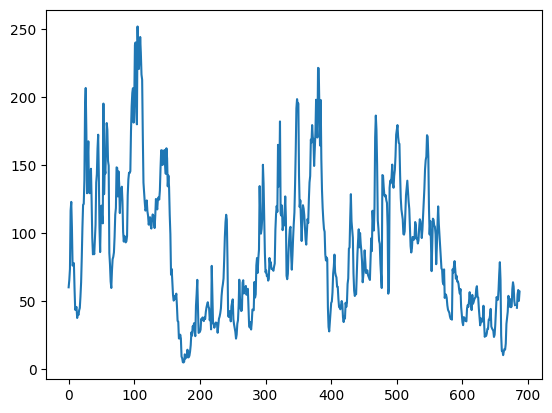

In [17]:
plt.plot(data["air"]["S0000457-Nguyen Che Nghia"]["data"]["PM2.5"][0 : 30 * 24])